# Interpolate two initial contions

In [1]:
import xarray as xr
import numpy as np
import os

In [2]:
path_a = "/Odyssey/public/glonet/osse/2025-07-17_init_states"  # GLO12 truth data
path_b = "/Odyssey/public/glonet/osse/2025-07-17_init_from_2025-07-14_noised" # model prediction

In [3]:


# Define file names
files = ["input1.nc", "input2.nc", "input3.nc"]

# Read files from path_a
datasets_a = [xr.open_dataset(os.path.join(path_a, f)) for f in files]

# Read files from path_b
datasets_b = [xr.open_dataset(os.path.join(path_b, f)) for f in files]

!!! Check the date is coorect 

In [4]:
# datasets_b[0] # datasets_a[0]

## Interpolate and visualzation

In [5]:
def interpolate_datasets(ds1, ds2, weight=0.5):
    """Interpolate two xarray datasets with a given weight."""
    return ds1 * weight + ds2 * (1 - weight)

### Look the both forecast and truth at once. 

Text(0.5, 1.0, 'Dataset B')

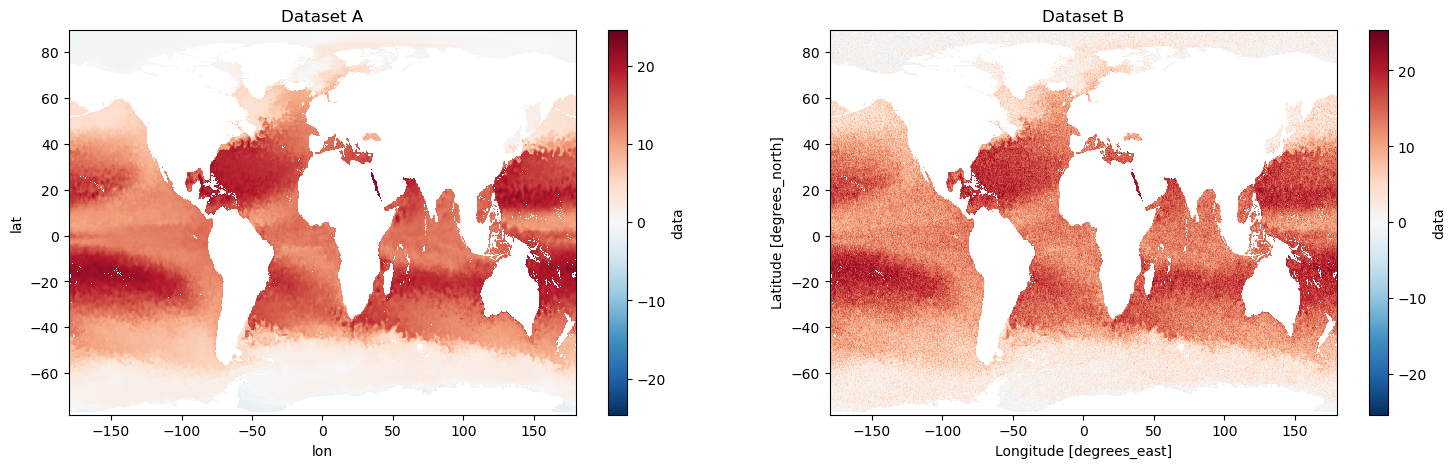

In [6]:
import matplotlib.pyplot as plt

file_idx = 1 # Index of the file to plot (0 for input1.nc, 1 for input2.nc, etc.)
time_idx = 1
ch_idx = 3

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
datasets_a[file_idx].isel(time=time_idx, ch=ch_idx).data.plot()
plt.title("Dataset A")
plt.subplot(1, 2, 2)
datasets_b[file_idx].isel(time=time_idx, ch=ch_idx).data.plot()
plt.title("Dataset B")

### The difference between forecast and truth
!!! On the right side, the intepolated data is plotted. </br>
***!!! Attention of the different scale of the two plot !!!***

In [7]:
test = interpolate_datasets(datasets_a[file_idx], datasets_b[file_idx], weight=0.5)

Text(0.5, 1.0, 'Interpolated Dataset (A + B) / 2')

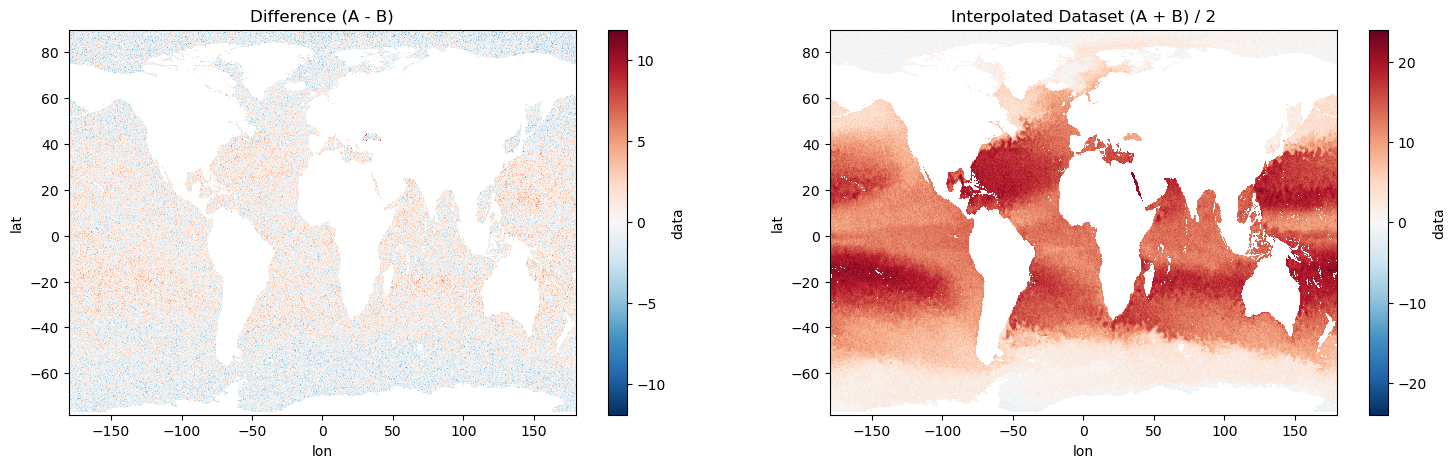

In [8]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
(datasets_a[file_idx] - datasets_b[file_idx]).isel(time=time_idx, ch=ch_idx).data.plot()
plt.title("Difference (A - B)")

plt.subplot(1, 2, 2)
test.isel(time=time_idx, ch=ch_idx).data.plot()
plt.title("Interpolated Dataset (A + B) / 2")

# Saving the file
**Don't forget to change output path**

In [9]:
# Interpolate and save all three files
output_folder = "/Odyssey/public/glonet/2025-07-17_init_interpolated_noised"
os.makedirs(output_folder, exist_ok=True)

for i, fname in enumerate(files):
    print(f"{i + 1}th file...")
    interp_ds = interpolate_datasets(datasets_a[i], datasets_b[i], weight=0.5)
    out_path = os.path.join(output_folder, fname)
    interp_ds.to_netcdf(out_path)
    print(f"Saved: {out_path}")

1th file...
Saved: /Odyssey/public/glonet/2025-07-17_init_interpolated_noised/input1.nc
2th file...
Saved: /Odyssey/public/glonet/2025-07-17_init_interpolated_noised/input2.nc
3th file...
Saved: /Odyssey/public/glonet/2025-07-17_init_interpolated_noised/input3.nc
